# Real-Time Predictive Power Management in IOT Devices

## Step 1: Importing Important Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Step 2: Uploading a Dataset

In [2]:
df = pd.read_csv('Dataset/iot_load_data.csv')
df

,Temperature,Humidity,Day_of_Week,Time_of_Day,Holiday_Indicator,Previous_Load,Transportation_Data,Operational_Metrics,IoT_Sensor_Data,External_Factors,...,Regulation_Capacity,Day_Ahead_LMP,Day_Ahead_EC,Day_Ahead_CC,Day_Ahead_MLC,Real_Time_EC,Real_Time_CC,Real_Time_MLC,System_Load,Electricity_Load
0,2,69,3,Afternoon,1,812,25,201,0.808578,Regulatory,...,82,33.526050,13.661695,4.339328,1.568146,18.903664,4.407353,1.385887,518,753
1,14,26,4,Evening,0,963,25,139,0.400364,Other,...,75,44.547889,6.118156,8.685590,4.317611,22.458212,5.615720,2.689898,503,872
2,19,73,5,Afternoon,0,753,11,497,0.748848,Economic,...,87,37.807827,8.405380,6.072040,3.776703,13.400587,1.741812,1.610319,897,525
3,23,59,6,Morning,0,839,16,464,0.213119,Regulatory,...,54,41.700664,9.233539,4.299356,1.900629,16.558408,3.974303,2.798738,526,568
4,28,32,0,Afternoon,0,505,24,142,0.089296,Regulatory,...,97,56.762892,8.772969,2.025394,2.949036,20.760512,4.140475,1.041746,958,636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17054,33,60,5,Evening,0,664,22,110,0.095480,Other,...,99,48.374745,15.776848,9.550220,4.498868,17.709470,4.942861,1.720833,762,541
17055,-9,42,6,Afternoon,0,618,21,160,0.864928,Regulatory,...,84,45.107917,15.023013,7.512798,2.252683,23.651281,2.525749,0.767173,815,759
17056,34,56,0,Afternoon,0,691,28,246,0.140741,Regulatory,...,69,44.967313,8.460213,2.916418,1.394678,10.493837,3.827922,1.010197,735,535
17057,-10,44,1,Evening,0,564,23,381,0.073000,Regulatory,...,74,58.498240,17.480796,7.642207,1.327418,22.008915,7.608274,1.790598,609,591


In [3]:
df.columns

Index(['Temperature', 'Humidity', 'Day_of_Week', 'Time_of_Day',
       'Holiday_Indicator', 'Previous_Load', 'Transportation_Data',
       'Operational_Metrics', 'IoT_Sensor_Data', 'External_Factors',
       'Day_Ahead_Demand', 'Real_Time_LMP', 'Regulation_Capacity',
       'Day_Ahead_LMP', 'Day_Ahead_EC', 'Day_Ahead_CC', 'Day_Ahead_MLC',
       'Real_Time_EC', 'Real_Time_CC', 'Real_Time_MLC', 'System_Load',
       'Electricity_Load'],
      dtype='object')

## Step 3: Data Pre-processing 

In [4]:
df.shape

(17059, 22)

In [5]:
df.size

375298

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17059 entries, 0 to 17058
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Temperature          17059 non-null  int64  
 1   Humidity             17059 non-null  int64  
 2   Day_of_Week          17059 non-null  int64  
 3   Time_of_Day          17059 non-null  object 
 4   Holiday_Indicator    17059 non-null  int64  
 5   Previous_Load        17059 non-null  int64  
 6   Transportation_Data  17059 non-null  int64  
 7   Operational_Metrics  17059 non-null  int64  
 8   IoT_Sensor_Data      17059 non-null  float64
 9   External_Factors     17059 non-null  object 
 10  Day_Ahead_Demand     17059 non-null  int64  
 11  Real_Time_LMP        17059 non-null  float64
 12  Regulation_Capacity  17059 non-null  int64  
 13  Day_Ahead_LMP        17059 non-null  float64
 14  Day_Ahead_EC         17059 non-null  float64
 15  Day_Ahead_CC         17059 non-null 

In [7]:
df.isnull().sum()

Temperature            0
Humidity               0
Day_of_Week            0
Time_of_Day            0
Holiday_Indicator      0
Previous_Load          0
Transportation_Data    0
Operational_Metrics    0
IoT_Sensor_Data        0
External_Factors       0
Day_Ahead_Demand       0
Real_Time_LMP          0
Regulation_Capacity    0
Day_Ahead_LMP          0
Day_Ahead_EC           0
Day_Ahead_CC           0
Day_Ahead_MLC          0
Real_Time_EC           0
Real_Time_CC           0
Real_Time_MLC          0
System_Load            0
Electricity_Load       0
dtype: int64

In [8]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17059 entries, 0 to 17058
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Temperature          17059 non-null  int64  
 1   Humidity             17059 non-null  int64  
 2   Day_of_Week          17059 non-null  int64  
 3   Time_of_Day          17059 non-null  int32  
 4   Holiday_Indicator    17059 non-null  int64  
 5   Previous_Load        17059 non-null  int64  
 6   Transportation_Data  17059 non-null  int64  
 7   Operational_Metrics  17059 non-null  int64  
 8   IoT_Sensor_Data      17059 non-null  float64
 9   External_Factors     17059 non-null  int32  
 10  Day_Ahead_Demand     17059 non-null  int64  
 11  Real_Time_LMP        17059 non-null  float64
 12  Regulation_Capacity  17059 non-null  int64  
 13  Day_Ahead_LMP        17059 non-null  float64
 14  Day_Ahead_EC         17059 non-null  float64
 15  Day_Ahead_CC         17059 non-null 

## Step 4: Applying EDA - Exploratary Data Analysis

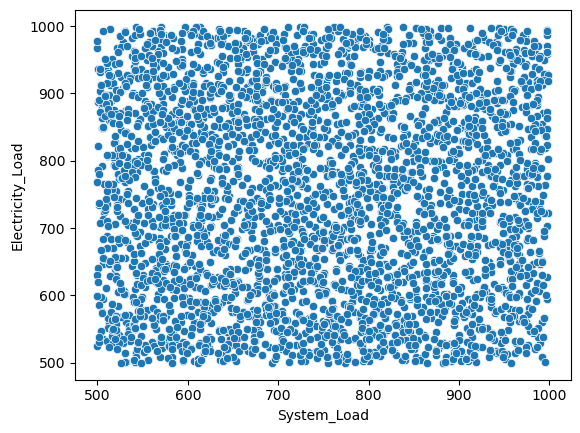

In [10]:
sns.scatterplot(x = df['System_Load'], y = df['Electricity_Load'], data = df)

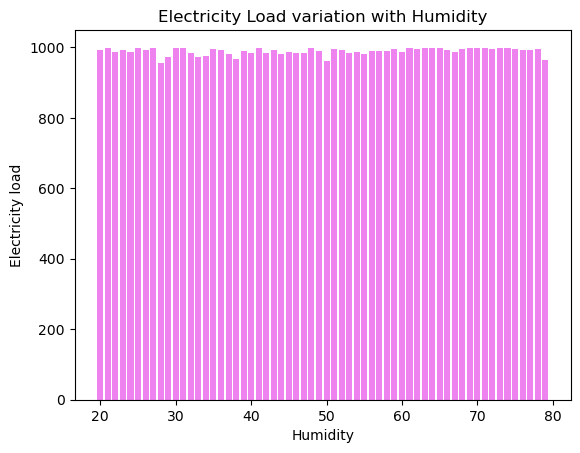

In [11]:
plt.bar(df['Humidity'],df['Electricity_Load'],color='violet')
plt.title('Electricity Load variation with Humidity')
plt.xlabel('Humidity')
plt.ylabel('Electricity load')
plt.show()

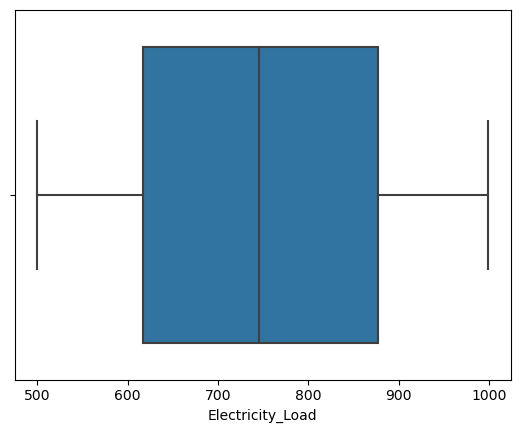

In [12]:
sns.boxplot(x=df['Electricity_Load'])
plt.show()


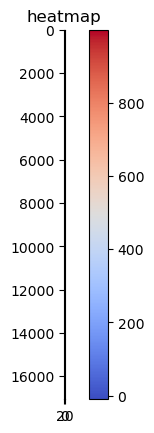

In [13]:
plt.imshow(df,cmap='coolwarm',interpolation='nearest')
plt.colorbar()
plt.title('heatmap')
plt.show()

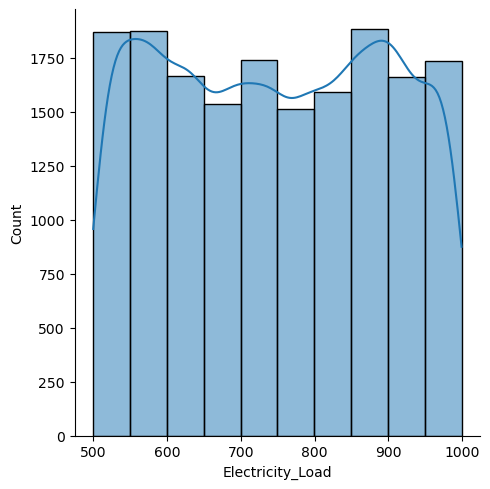

In [14]:
sns.displot(df['Electricity_Load'],bins=10,kde=True)

## Step 5: X and y Speration

In [15]:
X = df.drop('Electricity_Load', axis = 1)
X

,Temperature,Humidity,Day_of_Week,Time_of_Day,Holiday_Indicator,Previous_Load,Transportation_Data,Operational_Metrics,IoT_Sensor_Data,External_Factors,...,Real_Time_LMP,Regulation_Capacity,Day_Ahead_LMP,Day_Ahead_EC,Day_Ahead_CC,Day_Ahead_MLC,Real_Time_EC,Real_Time_CC,Real_Time_MLC,System_Load
0,2,69,3,0,1,812,25,201,0.808578,2,...,25.141389,82,33.526050,13.661695,4.339328,1.568146,18.903664,4.407353,1.385887,518
1,14,26,4,1,0,963,25,139,0.400364,1,...,20.703909,75,44.547889,6.118156,8.685590,4.317611,22.458212,5.615720,2.689898,503
2,19,73,5,0,0,753,11,497,0.748848,0,...,46.367384,87,37.807827,8.405380,6.072040,3.776703,13.400587,1.741812,1.610319,897
3,23,59,6,2,0,839,16,464,0.213119,2,...,49.862441,54,41.700664,9.233539,4.299356,1.900629,16.558408,3.974303,2.798738,526
4,28,32,0,0,0,505,24,142,0.089296,2,...,34.631596,97,56.762892,8.772969,2.025394,2.949036,20.760512,4.140475,1.041746,958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17054,33,60,5,1,0,664,22,110,0.095480,1,...,32.091229,99,48.374745,15.776848,9.550220,4.498868,17.709470,4.942861,1.720833,762
17055,-9,42,6,0,0,618,21,160,0.864928,2,...,43.502861,84,45.107917,15.023013,7.512798,2.252683,23.651281,2.525749,0.767173,815
17056,34,56,0,0,0,691,28,246,0.140741,2,...,29.111099,69,44.967313,8.460213,2.916418,1.394678,10.493837,3.827922,1.010197,735
17057,-10,44,1,1,0,564,23,381,0.073000,2,...,34.085699,74,58.498240,17.480796,7.642207,1.327418,22.008915,7.608274,1.790598,609


In [16]:
y = df['Electricity_Load']
y

0        753
1        872
2        525
3        568
4        636
        ... 
17054    541
17055    759
17056    535
17057    591
17058    570
Name: Electricity_Load, Length: 17059, dtype: int64

In [17]:
y = np.log1p(y)  # Apply log transformation

In [18]:
y

0        6.625392
1        6.771936
2        6.265301
3        6.343880
4        6.456770
           ...   
17054    6.295266
17055    6.633318
17056    6.284134
17057    6.383507
17058    6.347389
Name: Electricity_Load, Length: 17059, dtype: float64

### 5.1 Splitting Data into Training and Testing

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
X_train.shape

(13647, 21)

In [21]:
y_train.shape

(13647,)

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 5.2 Calculate Regression Metrics function

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Function to calculate regression metrics
def calculateRegressionMetrics(algorithm, predict, testY):
    # Calculate metrics
    mae = mean_absolute_error(testY, predict)
    mse = mean_squared_error(testY, predict)
    rmse = np.sqrt(mse)
    r2 = r2_score(testY, predict)
    
    # Print metrics
    print(f"{algorithm} Mean Absolute Error (MAE): {mae:.2f}")
    print(f"{algorithm} Mean Squared Error (MSE): {mse:.2f}")
    print(f"{algorithm} Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"{algorithm} R2 Score: {r2:.2f}")
    
    # Scatter plot of actual vs predicted values
    plt.figure(figsize=(7, 7))
    plt.scatter(testY, predict, color='blue', alpha=0.6)
    plt.plot([min(testY), max(testY)], [min(testY), max(testY)], color='red', linestyle='--', linewidth=2)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{algorithm} Predicted vs Actual Values")
    plt.grid(True)
    plt.show()

## Step 6: Model Building and Training

### 6.1 Support Vector  Regressor

SVR Regressor Mean Absolute Error (MAE): 0.17
SVR Regressor Mean Squared Error (MSE): 0.04
SVR Regressor Root Mean Squared Error (RMSE): 0.20
SVR Regressor R2 Score: 0.00


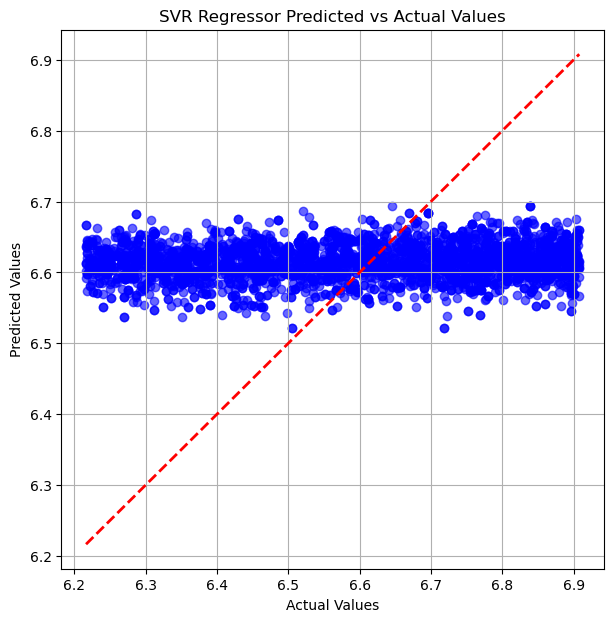

In [24]:
import os, joblib
from sklearn.svm import SVR

model = 'svr_regressor.pkl'
if os.path.exists(model):
    # Load the model from the pkl file
    svr_regressor = joblib.load(model)
    predict = svr_regressor.predict(X_test)
    calculateRegressionMetrics("SVR Regressor", predict, y_test)
else:
    svr_regressor = SVR()
    # Train the regressor on the training data
    svr_regressor.fit(X_train, y_train)
    # Make predictions on the test data
    predict = svr_regressor.predict(X_test)
    joblib.dump(svr_regressor, model)
    print("SVR Regressor trained and model weights saved.")
    calculateRegressionMetrics("SVR Regressor", predict, y_test)

### 6.2 KNN Regressor

KNN Regressor Mean Absolute Error (MAE): 0.07
KNN Regressor Mean Squared Error (MSE): 0.01
KNN Regressor Root Mean Squared Error (RMSE): 0.12
KNN Regressor R2 Score: 0.65


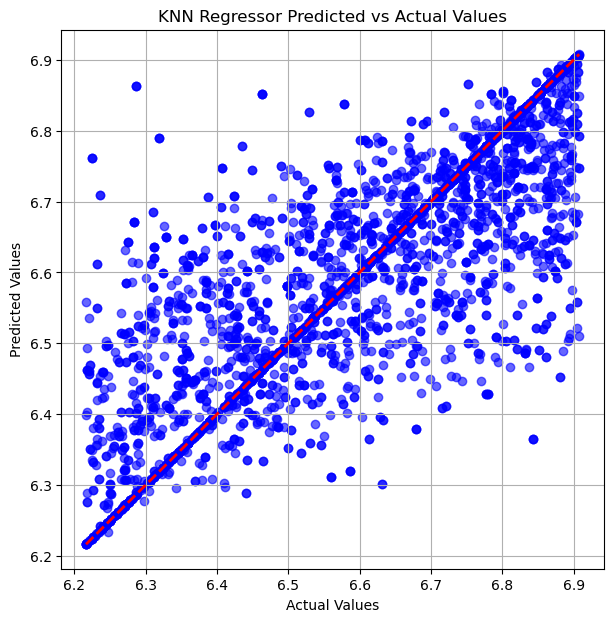

In [25]:
from sklearn.neighbors import KNeighborsRegressor

model = 'knn_regressor.pkl'
if os.path.exists(model):
    # Load the model from the pkl file
    knn_regressor = joblib.load(model)
    predict = knn_regressor.predict(X_test_scaled)
    calculateRegressionMetrics("KNN Regressor", predict, y_test)
else:
    knn_regressor = KNeighborsRegressor()
    # Train the regressor on the training data
    knn_regressor.fit(X_train_scaled, y_train)
    # Make predictions on the test data
    predict = knn_regressor.predict(X_test_scaled)
    joblib.dump(knn_regressor, model)
    print("KNN Regressor trained and model weights saved.")
    calculateRegressionMetrics("KNN Regressor", predict, y_test)


### 6.3 Random Forest Regressor

Random Forest Mean Absolute Error (MAE): 0.01
Random Forest Mean Squared Error (MSE): 0.00
Random Forest Root Mean Squared Error (RMSE): 0.03
Random Forest R2 Score: 0.97


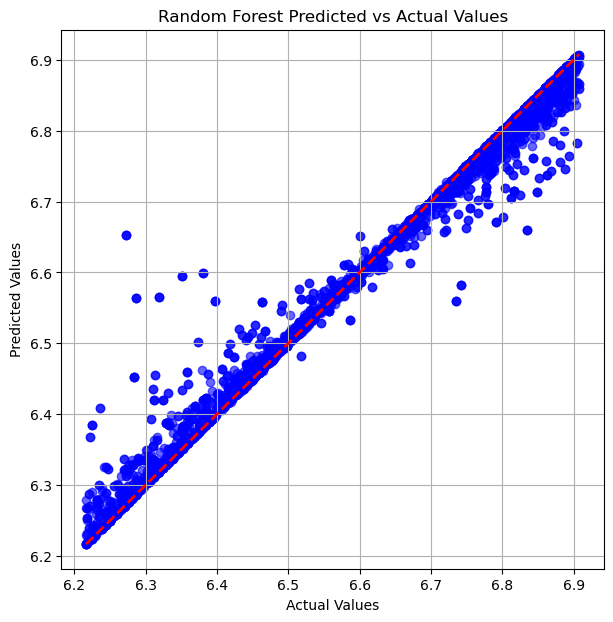

In [26]:
from sklearn.ensemble import RandomForestRegressor

model = 'random_forest.pkl'
if os.path.exists(model):
    # Load the model from the pkl file
    random_forest = joblib.load(model)
    predict = random_forest.predict(X_test)
    calculateRegressionMetrics("Random Forest", predict, y_test)
else:
    random_forest = RandomForestRegressor()
    # Train the classifier on the training data
    random_forest.fit(X_train, y_train)
    # Make predictions on the test data
    predict = random_forest.predict(X_test)
    joblib.dump(random_forest, model)
    print("Random Forest trained and model weights saved.")
    calculateRegressionMetrics("Random Forest", predict, y_test)

### 6.4 Decision Tree Regressor

Model loaded successfully.
Decision Tree Regressor Mean Absolute Error (MAE): 0.00
Decision Tree Regressor Mean Squared Error (MSE): 0.00
Decision Tree Regressor Root Mean Squared Error (RMSE): 0.03
Decision Tree Regressor R2 Score: 0.98


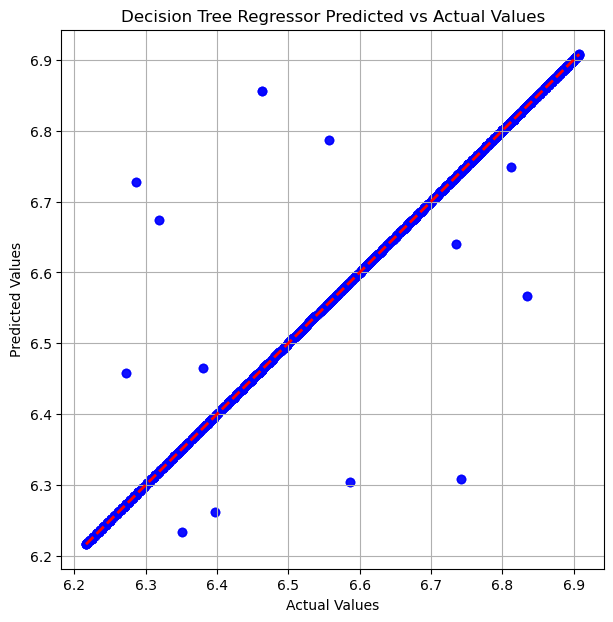

In [27]:
from sklearn.tree import DecisionTreeRegressor

modelfile = 'DTR.pkl'  # Updated model file for regression
if os.path.exists(modelfile):
    # Load the trained model from the file
    dt_regressor = joblib.load(modelfile)
    print("Model loaded successfully.")
    predict = dt_regressor.predict(X_test)
    calculateRegressionMetrics("Decision Tree Regressor", predict, y_test)
else:
    # Initialize and train the Gradient Boosting Regressor model
    dt_regressor = DecisionTreeRegressor(random_state=42)  # Use the regressor version
    dt_regressor.fit(X_train, y_train)
    # Save the trained model to a file
    joblib.dump(dt_regressor, modelfile) 
    print("Model saved successfully.")
    predict = dt_regressor.predict(X_test)
    calculateRegressionMetrics("Decision Tree Regressor", predict, y_test)

## Step 7: consider test data

In [28]:
df2 = pd.read_csv('Dataset/iot_load_data.csv')
df2

,Temperature,Humidity,Day_of_Week,Time_of_Day,Holiday_Indicator,Previous_Load,Transportation_Data,Operational_Metrics,IoT_Sensor_Data,External_Factors,...,Regulation_Capacity,Day_Ahead_LMP,Day_Ahead_EC,Day_Ahead_CC,Day_Ahead_MLC,Real_Time_EC,Real_Time_CC,Real_Time_MLC,System_Load,Electricity_Load
0,2,69,3,Afternoon,1,812,25,201,0.808578,Regulatory,...,82,33.526050,13.661695,4.339328,1.568146,18.903664,4.407353,1.385887,518,753
1,14,26,4,Evening,0,963,25,139,0.400364,Other,...,75,44.547889,6.118156,8.685590,4.317611,22.458212,5.615720,2.689898,503,872
2,19,73,5,Afternoon,0,753,11,497,0.748848,Economic,...,87,37.807827,8.405380,6.072040,3.776703,13.400587,1.741812,1.610319,897,525
3,23,59,6,Morning,0,839,16,464,0.213119,Regulatory,...,54,41.700664,9.233539,4.299356,1.900629,16.558408,3.974303,2.798738,526,568
4,28,32,0,Afternoon,0,505,24,142,0.089296,Regulatory,...,97,56.762892,8.772969,2.025394,2.949036,20.760512,4.140475,1.041746,958,636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17054,33,60,5,Evening,0,664,22,110,0.095480,Other,...,99,48.374745,15.776848,9.550220,4.498868,17.709470,4.942861,1.720833,762,541
17055,-9,42,6,Afternoon,0,618,21,160,0.864928,Regulatory,...,84,45.107917,15.023013,7.512798,2.252683,23.651281,2.525749,0.767173,815,759
17056,34,56,0,Afternoon,0,691,28,246,0.140741,Regulatory,...,69,44.967313,8.460213,2.916418,1.394678,10.493837,3.827922,1.010197,735,535
17057,-10,44,1,Evening,0,564,23,381,0.073000,Regulatory,...,74,58.498240,17.480796,7.642207,1.327418,22.008915,7.608274,1.790598,609,591


In [29]:
df2.drop('Electricity_Load', axis =1 , inplace = True)

In [30]:
testdata = pd.read_csv('Dataset/testdata.csv')
testdata

,Temperature,Humidity,Day_of_Week,Time_of_Day,Holiday_Indicator,Previous_Load,Transportation_Data,Operational_Metrics,IoT_Sensor_Data,External_Factors,...,Real_Time_LMP,Regulation_Capacity,Day_Ahead_LMP,Day_Ahead_EC,Day_Ahead_CC,Day_Ahead_MLC,Real_Time_EC,Real_Time_CC,Real_Time_MLC,System_Load
0,2,69,3,0,1,812,25,201,0.808578,2,...,25.141389,82,33.526050,13.661695,4.339328,1.568146,18.903664,4.407353,1.385887,518
1,14,26,4,1,0,963,25,139,0.400364,1,...,20.703909,75,44.547889,6.118156,8.685590,4.317611,22.458212,5.615720,2.689898,503
2,19,73,5,0,0,753,11,497,0.748848,0,...,46.367384,87,37.807827,8.405380,6.072040,3.776703,13.400587,1.741812,1.610319,897
3,23,59,6,2,0,839,16,464,0.213119,2,...,49.862441,54,41.700664,9.233539,4.299356,1.900629,16.558408,3.974303,2.798738,526
4,28,32,0,0,0,505,24,142,0.089296,2,...,34.631596,97,56.762892,8.772969,2.025394,2.949036,20.760512,4.140475,1.041746,958
5,31,20,1,3,0,967,44,338,0.293432,1,...,35.815497,86,45.360121,10.993890,4.038407,1.980096,24.330641,2.846294,1.035373,647
6,30,63,2,3,0,861,36,134,0.628813,2,...,35.971403,53,45.847147,12.116086,8.818269,1.895418,17.893334,1.408411,1.903054,684
7,8,68,3,1,0,992,13,191,0.559112,1,...,36.257996,84,43.250395,7.330128,7.541367,4.537094,16.585402,7.610187,2.335046,960
8,9,37,4,3,0,841,21,175,0.182765,1,...,27.236407,88,48.416229,12.148968,2.750291,4.376475,16.769879,5.039348,2.241125,670
9,26,67,5,2,0,978,29,183,0.588450,0,...,23.068385,80,48.426431,17.904451,9.648401,1.445616,19.972580,2.964104,0.748446,587


## Step 8: Make Predictions

In [31]:
pred = dt_regressor.predict(testdata)
pred

array([6.62539237, 6.77193556, 6.26530121, 6.34388043, 6.45676966,
       6.8596149 , 6.52502966, 6.85012617, 6.55250789, 6.77650699,
       6.63987583, 6.79234443, 6.48768402, 6.31354805, 6.62273632,
       6.63594656, 6.53524127, 6.84161548, 6.58479139, 6.7178047 ])

In [32]:
actual_pred = np.expm1(pred)
actual_pred

array([753., 872., 525., 568., 636., 952., 681., 943., 700., 876., 764.,
       890., 656., 551., 751., 761., 688., 935., 723., 826.])

In [33]:
pred = dt_regressor.predict(testdata)
for i, p in enumerate(actual_pred):
    print(df2.iloc[i])  # Print the input features
    print(f"Row {i}:************************************************** Predicted Output: {p}")

Temperature                     2
Humidity                       69
Day_of_Week                     3
Time_of_Day             Afternoon
Holiday_Indicator               1
Previous_Load                 812
Transportation_Data            25
Operational_Metrics           201
IoT_Sensor_Data          0.808578
External_Factors       Regulatory
Day_Ahead_Demand              611
Real_Time_LMP           25.141389
Regulation_Capacity            82
Day_Ahead_LMP            33.52605
Day_Ahead_EC            13.661695
Day_Ahead_CC             4.339328
Day_Ahead_MLC            1.568146
Real_Time_EC            18.903664
Real_Time_CC             4.407353
Real_Time_MLC            1.385887
System_Load                   518
Name: 0, dtype: object
Row 0:************************************************** Predicted Output: 752.9999999999994
Temperature                   14
Humidity                      26
Day_of_Week                    4
Time_of_Day              Evening
Holiday_Indicator              0
Previ